# Project: Investigate TMDB Movie Database

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue.

Certain questions that we may choose to investigate are below:

* ** How has the profitability of movies changed over the years? **
* ** How is the rating on a movie correlated to it's revenue? **

A few other questions that come to mind are:

* Which directors have brought in the best ratings?
* Which production houses have produced the most revenue generating movies?
* Which movie genres have the most popularity and which ones bring in the most amount of revenue?
* Is a higher movie budget corelated to higher runtime durations?
* Have movie runtime durations changed over time?

In [172]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html

%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [173]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.

# Using the read_csv method from pandas to easily read the csv into a dataframe df.
df = pd.read_csv('tmdb-movies.csv')

In [174]:
# Print out the first 5 entries of the dataframe to check for the overall data structure
# and detect inconsistencies if any.
df.head(5)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


Few notable points are listed below:

* We know that, the final two columns ending with `_adj` show the budget and revenue of the associated movie in terms of 2010 dollars, accounting for inflation over time.
* The cast list is provided in the `cast` column where each member is separated by a `|` pipe. Similar format for `genres` column.
* The `homepage` url, `tagline` and `overview` columns may not be very useful for our basic data analysis purposes. We may consider eliminating these columns at some point.

In [175]:
# Use the info method to find out more about the count and datatypes of each column.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

**Total number of rows = 10866**<br/>
**Total number of columns = 21**

Release Date is an object type that needs to be converted to date type.

In [176]:
# Find the number of duplicated rows
df.duplicated().sum()

1

In [177]:
# Print that duplicated row.
df[df.duplicated(keep=False)]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
2089,42194,tt0411951,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010,30000000.0,967000.0
2090,42194,tt0411951,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010,30000000.0,967000.0


We will remove the above duplicate row in our data cleaning phase.

In [178]:
# Find the number of null data fields for each column.
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

Above we see that there are many fields without data available mostly for `homepage` url, `tagline`, `keywords` or `production_companies`.
Also note that there are 10 null `imdb_id` values but that should not be a problem for our analysis.

In [179]:
# Some statistics on budget field.
df.budget_adj.describe()

count    1.086600e+04
mean     1.755104e+07
std      3.430616e+07
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      2.085325e+07
max      4.250000e+08
Name: budget_adj, dtype: float64

In [180]:
df.query('budget_adj == 0 or revenue_adj == 0').shape

(7011, 21)

In [181]:
df.query('budget == 0 or revenue == 0').shape

(7011, 21)

Here we find that out of our total of 10866 there are 7011 entries with 0 budget or revenue data. This is probably because the data is not available for these entries. We should try to eliminate these entries if we're trying to investigate some factor related to the budget. But since it consists of a large percentage of the data we have available, we will not be removing it during our data cleaning.

From above result we know that there is one duplicate row that we should eliminate.

### Data Cleaning

In the above section we have investigated our dataset and have discovered inconsistencies that need to be corrected. We make those corrections below.

#### Remove Duplicate Rows

In [182]:
# Drop duplicates will delete the first duplicate instance by default
# The operation will be done in place instead of returning a new copy of the data frame.

df.drop_duplicates(inplace=True)

In [183]:
df.duplicated().sum()

0

#### Drop Nan Genre rows
We will want to drop the rows that have null value in the `genres` column since we will be working with that data during our investigation.

In [184]:
# In place drop all rows where genres value is NaN.
df.dropna(subset=['genres'], inplace=True)

#### Trim Unrequired Columns
We will completely remove columns `homepage`, `tagline`, and `overview` because they are mostly textual descriptions and we will not be requiring them at all for our current analysis purposes.

In [185]:
# if statement to prevent error during re-execution when columns have already been deleted
# here 1 is the axis number (0 for rows and 1 for columns)
if 'homepage' in df:
    df.drop(['homepage', 'tagline', 'overview'], axis=1, inplace=True)

In [186]:
# print the list of columns to verify deletion.
list(df)

['id',
 'imdb_id',
 'popularity',
 'budget',
 'revenue',
 'original_title',
 'cast',
 'director',
 'keywords',
 'runtime',
 'genres',
 'production_companies',
 'release_date',
 'vote_count',
 'vote_average',
 'release_year',
 'budget_adj',
 'revenue_adj']

#### Convert release_date to Date Type

In [187]:
df.release_date = pd.to_datetime(df['release_date'])
df.release_date.dtype

dtype('<M8[ns]')

#### Final Data Format Example
Let us have a look at our data set after wrangling and cleaning. We print out the first 5 rows of the dataset at present.

In [188]:
df.shape

(10842, 18)

In [189]:
df.head(5)

,id,imdb_id,popularity,budget,revenue,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,future|chase|post-apocalyptic|dystopia|australia,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,based on novel|revolution|dystopia|sequel|dyst...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,android|spaceship|jedi|space opera|3d,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,car race|speed|revenge|suspense|car,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015-04-01,2947,7.3,2015,1.747999e+08,1.385749e+09


<a id='eda'></a>
## Exploratory Data Analysis

### Research Question 1 - What are the most popular movie genres?

First we would like to find out what are the most profitable genres. We assume that the more popular a genre is, the more number of movies will be made on that genre. Hence we will basically look into which are the genres with the most number of movies.

Our approach would be to create a new dictionary that will contain the `genre_name` split by the `|` and it's corresponding number of movies in a column named `movie_count`.

In [190]:
# Takes a dataframe as parameter
# returns a dictionary of genres
# with their respective count of number of movies.
def getGenreCounts(data):
    genre_count = {}
    for index, row in data.iterrows():
        genres = row["genres"].split("|")
        for genre_item in genres:
            if genre_item not in genre_count:
                genre_count[genre_item] = 1
            else:
                genre_count[genre_item] += 1
    return genre_count;    

In [191]:
genre_count = getGenreCounts(df)

genre_count

{'Action': 2384,
 'Adventure': 1471,
 'Animation': 699,
 'Comedy': 3793,
 'Crime': 1354,
 'Documentary': 520,
 'Drama': 4760,
 'Family': 1231,
 'Fantasy': 916,
 'Foreign': 188,
 'History': 334,
 'Horror': 1637,
 'Music': 408,
 'Mystery': 810,
 'Romance': 1712,
 'Science Fiction': 1229,
 'TV Movie': 167,
 'Thriller': 2907,
 'War': 270,
 'Western': 165}

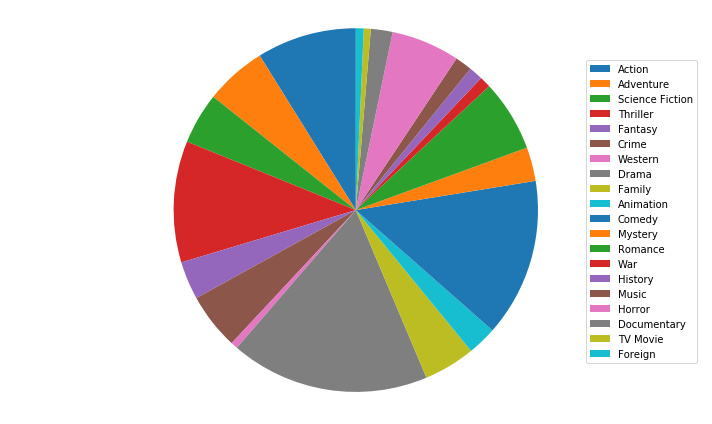

In [192]:
labels = list(genre_count.keys())
counts = list(genre_count.values())

# Generate pie chart from list of labels and counts of the genre_count dictionary.
patches, texts = plt.pie(counts, shadow=False, startangle=90)
fig = plt.gcf()
fig.set_size_inches(10,6)
plt.legend(patches, labels, loc="right")
plt.axis('equal')
plt.tight_layout()
plt.show()

The above pie chart looks a bit crowded, so we will try to make some sort of generalisation and club the genres with very low percentages into an `others` category.

In [193]:
# convert the genre_count dictionary to a pandas series.
genre_series = pd.Series(genre_count)
genre_series.describe()

count      20.000000
mean     1347.750000
std      1260.308228
min       165.000000
25%       389.500000
50%      1072.500000
75%      1655.750000
max      4760.000000
dtype: float64

In [194]:
# sort the dictionary.
genre_series = genre_series.sort_values(ascending=False)
genre_series

Drama              4760
Comedy             3793
Thriller           2907
Action             2384
Romance            1712
Horror             1637
Adventure          1471
Crime              1354
Family             1231
Science Fiction    1229
Fantasy             916
Mystery             810
Animation           699
Documentary         520
Music               408
History             334
War                 270
Foreign             188
TV Movie            167
Western             165
dtype: int64

In [195]:
# Club the genres with low count of movies ( <= 500)
other_genres = genre_series[genre_series <= 500]
other_genres_series = pd.Series({'Others': other_genres.sum()})

# Get the genres which haven't been clubbed.
primary_genres = genre_series[genre_series > 500]

# Append the `Other` category into the primary genres series.
primary_genres = primary_genres.append(other_genres_series)

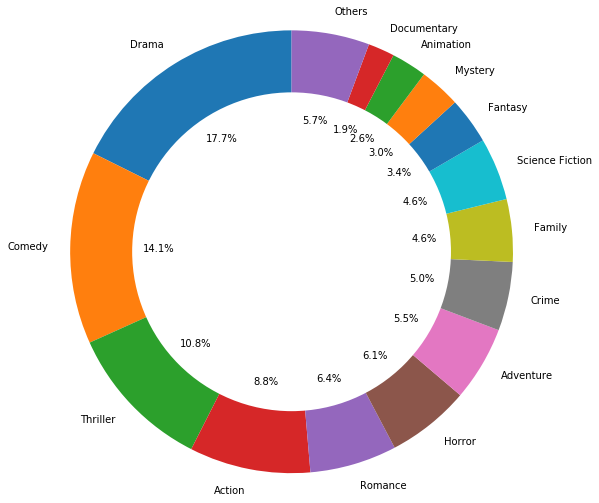

In [196]:
labels = list(primary_genres.keys())
counts = list(primary_genres)

# Draw the pie chart
fig1, ax1 = plt.subplots()
ax1.pie(counts, labels=labels, autopct='%1.1f%%', startangle=90)
# Draw a central circle
centre_circle = plt.Circle((0,0),0.72,fc='white')
fig = plt.gcf()
fig.set_size_inches(7, 7)
fig.gca().add_artist(centre_circle)
ax1.axis('equal')  
plt.tight_layout()
plt.show()

Above we see how `Drama` and `Comedy` make up for the majority of movies made in our dataset, followed by `Thriller` and `Action` genres.

### Research Question 2 - How has profitability of movies changed over the years?

Have movies become more or less profitable over the years?

Before we can dive deeper into that question, we need to decide how to determine profitability. We will add a new column `profit` which will be the difference between the revenue and the budget. We will use the `revenue_adj` and `budget_adj` as the values have accounted for inflation over time and hence would give us a more realistic insight into the profitability.

In [197]:
# Basic function to calculate the profit of the row passed as parameter.
def calculate_profits(row):
    return row['revenue_adj'] - row['budget_adj']

# insert new column to dataframe named profit and pass lambda function calculate profits to populate the value.
df['profit'] = df.apply(calculate_profits, axis=1)

In [198]:
# Check creation of new column 'profit'
df.head(5)

,id,imdb_id,popularity,budget,revenue,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,1.254446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,future|chase|post-apocalyptic|dystopia|australia,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08,2.101614e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,based on novel|revolution|dystopia|sequel|dyst...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08,1.704191e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,android|spaceship|jedi|space opera|3d,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,5292,7.5,2015,1.839999e+08,1.902723e+09,1.718723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,car race|speed|revenge|suspense|car,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015-04-01,2947,7.3,2015,1.747999e+08,1.385749e+09,1.210949e+09


Now that we have a column that indicates the measure of profitability of the movie, we can proceed with our question.

First we would like to check how profitability has varied over the years.

For that we will first generate a new dataframe that contains all movies that were profitable.

In [199]:
# MIKI NOTES: take mean of profit making movies only
# over the years has the number of loss making movies reduced.

# get the dataframe of movies which are profitable.
profitable_movies = df.query('profit > 0')
profitable_movies.shape

(3773, 19)

In [200]:
# get the dataframe of movies which have made loss.
loss_movies = df.query('profit < 0')
loss_movies.shape

(2386, 19)

In [201]:
# get the size of movies which have 0 profit (meaning zero budget AND revenue data)
df.query('profit == 0').shape

(4683, 19)

Above we see how the dataframe of profitable movies has 3773 rows. This is because since we are filtering for only the profit making movies (where (revenue - budget) > 0) this automatically handles the case where `revenue` or `budget` is 0 in our dataset. This can also be verified by the size of the above dataframe which is 4683 + 3773 + 2386 = 10842.

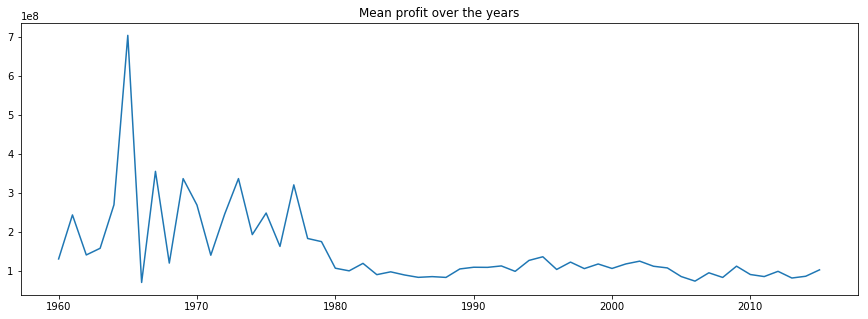

In [210]:
# group the dataframe of profitable_movies by release year
# and calculate the mean of profits that is made over that year.
yearly_profits = profitable_movies.groupby('release_year')['profit'].mean()

# use matplotlib to generate a line graph
plt.figure(figsize=(15,5))
plt.plot(yearly_profits)
plt.title('Mean profit over the years')
plt.show()

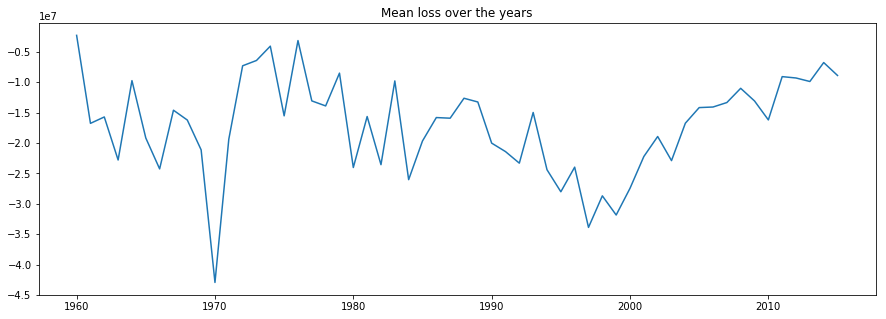

In [211]:
# group the dataframe of loss making movies by release year
# and calculate the mean of profits that is made over that year.
yearly_loss = loss_movies.groupby('release_year')['profit'].mean()

# use matplotlib to generate a line graph
plt.figure(figsize=(15,5))
plt.plot(yearly_loss)
plt.title('Mean loss over the years')
plt.show()

From above line graphs we see how profitability from movies had a huge spike followed by a corrective drop somewhere in the middle of the 1960 decade. The profitability curve becomes more stable during the 1980 - 2015 period.

Similary if we look into the graph for mean loss, we find that the mean loss from movies had a sharp incline during 1970 and around 1997.

Overall we notice no particular trend in the profitability of movies over the years.

### Research Question 3  - How is the rating of a movie correlated to it's revenue?

Next, we will look into the data and try to find if there is some correlation between the ratings and the revenue of the movie. Logically we would expect to find a positive trend, such that higher rated movies are expected to fetch better revenue. Let us investigate with our dataset.

First, we will look into the `vote_average` column.

In [204]:
df.vote_average.describe()

count    10842.000000
mean         5.974064
std          0.934257
min          1.500000
25%          5.400000
50%          6.000000
75%          6.600000
max          9.200000
Name: vote_average, dtype: float64

We find nothing unexpected about the above description and proceed to look into the `vote_count` column.

In [205]:
df.vote_count.describe()

count    10842.000000
mean       217.823649
std        576.180993
min         10.000000
25%         17.000000
50%         38.000000
75%        146.000000
max       9767.000000
Name: vote_count, dtype: float64

We see above that the minimum number of votes on a movie is 10 and till 50% it remains at 38, which is quite low. But we also note that the mean `vote_count` is 217.82 and the standard deviation is 576 which is huge. Ideally in this scenario, we may consider that a movie with at least 50 votes, will indicate an unbiased `vote_average`. Hence we will filter the dataset accordingly.

In [206]:
movies_with_votes = df.query('vote_count >= 50')
movies_with_votes.vote_count.describe()

count    4754.000000
mean      469.020825
std       802.914219
min        50.000000
25%        87.000000
50%       181.000000
75%       464.000000
max      9767.000000
Name: vote_count, dtype: float64

In [207]:
# Group the dataframe based on rating
rating_groups = movies_with_votes.groupby('vote_average')['revenue_adj'].mean()

In [208]:
type(rating_groups)

pandas.core.series.Series

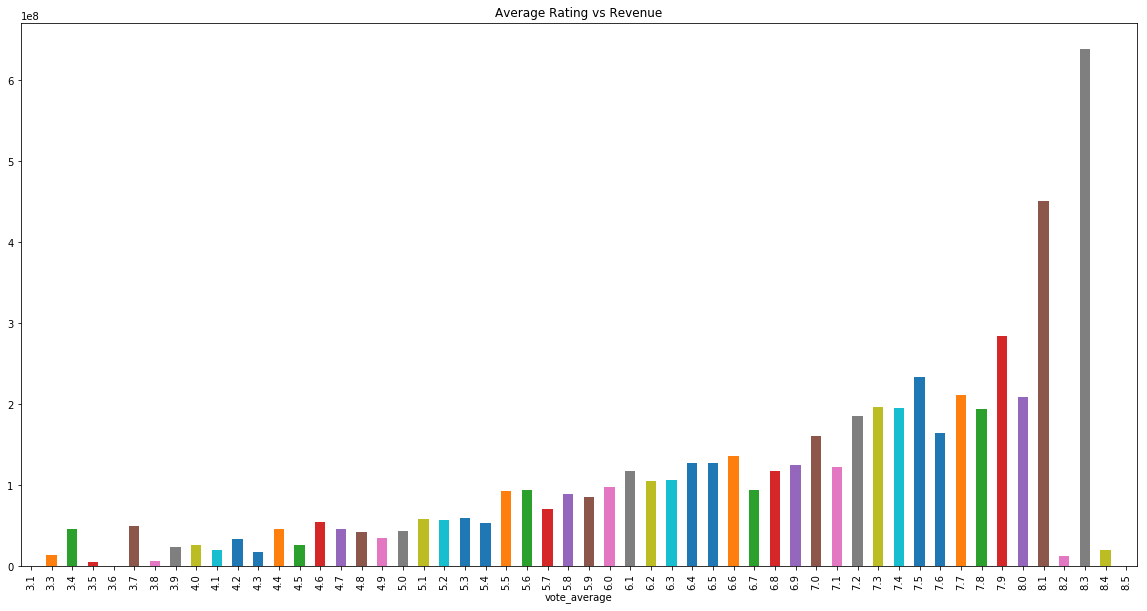

In [209]:
plt.figure(figsize=(20,10))
rating_groups.plot.bar()
plt.title('Average Rating vs Revenue')
plt.show()

From the above bar graph we find a positive trend correlation, such that movies which are higher rated, tend to also gather much higher revenue.

<a id='conclusions'></a>
## Conclusions

Before beginning the investigation we have come upon quite a few questions. Based on those we have explored the data to find answers to the questions below.

* **What are the most popular movie genres?**

Based on the given dataset we wanted to find what were the most popular genres. We found that `Drama` (17.7%) was the most popular genre of movie, followed by `Comedy` (14.1) and `Thriller` (10.8).
When we say popular, we mean to say which are the genres with the most number of produced movies. This is a very basic metric. If we were to dive deeper, we should try to use a computed weight-based metric based on factors such as revenue, popularity, as well as the number of movies produced. This should be a more accurate metric for popularity of the genre rather than ust the number of movies produced.

* **How has profitability of movies changed over the years?**

While investigating the above question, we looked into the subset of movies which were profitable (revenue > budget). We have found that there is no particular trend when looking into the profitability of movies over the years. Apart from a positive spike in the middle of the 1960th decade, profits made by movies have mostly been stagnant.

When looking into the subset of movies which were not profitable (budget > revenue), we did not find any specific trend.

When we asked the above question, ideally one would expect that the profitability of movies would rise over the years with an increasing number of audience going to the theatres and improved modes of distribution such as DVDs and online streaming. But the data showed otherwise. This is probably due to an increasing number of movies also being produced with time due to which it doesn't reflect in our dataset.

* **How is the rating of a movie correlated to it's revenue?**

We wanted to find out how the rating of a movie is correlated to it's revenue. We used the vote_count and vote_average to draw insights. A limitation faced here was that the vote_count was pretty low for a number of movies due to which we could not include them in our analysis since that may introduce some bias and the vote_average may not be an accurate representation of the actual quality of the movie.

As expected, we discovered that movies which have better revenues also tend to have better ratings, a positive trend. But this does not mean that better revenues will cause better ratings. This is just a correlation, that doesn't imply causation.

### Limitations

Before concluding on the investigation of the TMDB movie database, we should specify the limitations that we have encountered during exploration of the dataset.

* The database belongs to hollywood movies, and hence our findings may be more accurate for US, rather than and not necessarily for other regions across the world.
* For looking into profitability data, we removed a large number of entries that have either no budget or revenue data. Due to this we may be looking into a much smaller subset of data and hence our findings may not be as accurate.
* The popularity metric provided is unclear.
* The vote_count is quite low for a number of movies.

This concludes our investigation into the TMDB movie database 